In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
words = open('names.txt', 'r').read().splitlines()# splits the string into a list of strings, using line breaks as the separator.

In [3]:
len(words)

32033

In [4]:
chars = sorted(list(set(''.join(words))))
chars

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [5]:
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0

itos = {i:s for s,i in stoi.items()}

In [6]:
# build the dataset

for w in words[:2]:  
    print(w)
    context = '...'
    
    for ch in w + '.':
        print(context, '--->', ch)
        context = context[1:] + ch # crop and append

emma
... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
olivia
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .


In [7]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words[:2]:
    print(w)
    context = [0] * block_size
    
    for ch in w + '.':
        print(''.join(itos[i] for i in context), '--->', ch)
        
        X.append(context)
        Y.append(stoi[ch])
        context = context[1:] + [stoi[ch]] # crop and append
        
X = torch.tensor(X)
Y = torch.tensor(Y)        

emma
... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
olivia
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .


In [8]:
import numpy as np

print('Python List ', [1,2] * 3 ) 
print('Numpy Array ', np.array([1,2]) * 3 )
print('Pytorch Tensor ', torch.tensor([1,2]) * 3 )

Python List  [1, 2, 1, 2, 1, 2]
Numpy Array  [3 6]
Pytorch Tensor  tensor([3, 6])


In [9]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1]])

In [10]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0])

In [11]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([12, 3]), torch.int64, torch.Size([12]), torch.int64)

In [12]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words:
    #print(w)
    context = [0] * block_size
    
    for ch in w + '.':
        #print(''.join(itos[i] for i in context), '--->', ch)
        
        X.append(context)
        Y.append(stoi[ch])
        context = context[1:] + [stoi[ch]] # crop and append
        
X = torch.tensor(X)
Y = torch.tensor(Y)  

In [13]:
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [14]:
def build_dataset(words):
    # build the dataset
    X, Y = [], []
    for w in words:
        #print(w)
        context = [0] * block_size

        for ch in w + '.':
            #print(''.join(itos[i] for i in context), '--->', ch)
            
            X.append(context)
            Y.append(stoi[ch])
            context = context[1:] + [stoi[ch]] # crop and append

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y
    

In [15]:
torch.manual_seed(42)

C = torch.randn((27, 2)) # Embedding Lookup Table C
C

tensor([[ 1.9269,  1.4873],
        [ 0.9007, -2.1055],
        [ 0.6784, -1.2345],
        [-0.0431, -1.6047],
        [-0.7521,  1.6487],
        [-0.3925, -1.4036],
        [-0.7279, -0.5594],
        [-0.7688,  0.7624],
        [ 1.6423, -0.1596],
        [-0.4974,  0.4396],
        [-0.7581,  1.0783],
        [ 0.8008,  1.6806],
        [ 1.2791,  1.2964],
        [ 0.6105,  1.3347],
        [-0.2316,  0.0418],
        [-0.2516,  0.8599],
        [-1.3847, -0.8712],
        [-0.2234,  1.7174],
        [ 0.3189, -0.4245],
        [-0.8140, -0.7360],
        [-0.8371, -0.9224],
        [ 1.8113,  0.1606],
        [ 0.3672,  0.1754],
        [-1.1845,  1.3835],
        [-1.2024,  0.7078],
        [-1.0759,  0.5357],
        [ 1.1754,  0.5612]])

In [16]:
C[4, 1]# How do we index all the (228146, 3) elements stored in X simultaneously???

tensor(1.6487)

In [17]:
C[4]

tensor([-0.7521,  1.6487])

In [18]:
C[[4, 5, 6]]

tensor([[-0.7521,  1.6487],
        [-0.3925, -1.4036],
        [-0.7279, -0.5594]])

In [19]:
C[torch.tensor([4, 5, 6])]

tensor([[-0.7521,  1.6487],
        [-0.3925, -1.4036],
        [-0.7279, -0.5594]])

In [20]:
C[[4, 5, 6], [0, 0, 0]] # C[4,0] C[5,0] C[6, 0]

tensor([-0.7521, -0.3925, -0.7279])

In [21]:
C[torch.tensor([4, 5, 6]), torch.tensor([0, 0, 0])]

tensor([-0.7521, -0.3925, -0.7279])

In [22]:
C[ [[4, 5, 6],
    [0, 0, 0]] ]

tensor([-0.7521, -0.3925, -0.7279])

In [23]:
C[ torch.tensor([[4, 5, 6],
                 [0, 0, 0]]) ]

tensor([[[-0.7521,  1.6487],
         [-0.3925, -1.4036],
         [-0.7279, -0.5594]],

        [[ 1.9269,  1.4873],
         [ 1.9269,  1.4873],
         [ 1.9269,  1.4873]]])

In [24]:
X[:5]

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1]])

In [25]:
X[[0, 1, 2, 3, 4]]

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1]])

In [26]:
C[X[:5]]

tensor([[[ 1.9269,  1.4873],
         [ 1.9269,  1.4873],
         [ 1.9269,  1.4873]],

        [[ 1.9269,  1.4873],
         [ 1.9269,  1.4873],
         [-0.3925, -1.4036]],

        [[ 1.9269,  1.4873],
         [-0.3925, -1.4036],
         [ 0.6105,  1.3347]],

        [[-0.3925, -1.4036],
         [ 0.6105,  1.3347],
         [ 0.6105,  1.3347]],

        [[ 0.6105,  1.3347],
         [ 0.6105,  1.3347],
         [ 0.9007, -2.1055]]])

In [27]:
X[:5].shape, C[X[:5]].shape

(torch.Size([5, 3]), torch.Size([5, 3, 2]))

In [28]:
X.shape

torch.Size([228146, 3])

In [29]:
emb = C[X]
emb.shape

torch.Size([228146, 3, 2])

In [30]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [31]:
#emb @ W1 + b1 # error dimension mismatch! 

In [32]:
a = torch.arange(18) # similar to numpy arange
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [33]:
a.shape

torch.Size([18])

In [34]:
a.view((2, 9))

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16, 17]])

In [35]:
a.view((9, 2))

tensor([[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11],
        [12, 13],
        [14, 15],
        [16, 17]])

In [36]:
a.view((3, 3, 2)) # torch view is efficient !!! No memory is being changed, copied, moved or created !!!!

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [37]:
a.storage() # this is how it is stored in the memory, always a one dimensional vector!

/tmp/ipykernel_54870/411853419.py:1: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  a.storage() # this is how it is stored in the memory, always a one dimensional vector!


 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [38]:
emb.view(228146, 6)

tensor([[ 1.9269,  1.4873,  1.9269,  1.4873,  1.9269,  1.4873],
        [ 1.9269,  1.4873,  1.9269,  1.4873, -0.3925, -1.4036],
        [ 1.9269,  1.4873, -0.3925, -1.4036,  0.6105,  1.3347],
        ...,
        [ 1.1754,  0.5612,  1.1754,  0.5612, -1.0759,  0.5357],
        [ 1.1754,  0.5612, -1.0759,  0.5357,  1.1754,  0.5612],
        [-1.0759,  0.5357,  1.1754,  0.5612, -1.2024,  0.7078]])

In [39]:
emb.view(-1, 6)

tensor([[ 1.9269,  1.4873,  1.9269,  1.4873,  1.9269,  1.4873],
        [ 1.9269,  1.4873,  1.9269,  1.4873, -0.3925, -1.4036],
        [ 1.9269,  1.4873, -0.3925, -1.4036,  0.6105,  1.3347],
        ...,
        [ 1.1754,  0.5612,  1.1754,  0.5612, -1.0759,  0.5357],
        [ 1.1754,  0.5612, -1.0759,  0.5357,  1.1754,  0.5612],
        [-1.0759,  0.5357,  1.1754,  0.5612, -1.2024,  0.7078]])

In [40]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # Broadcasting !!!

In [41]:
# 228146, 100
#      1, 100

In [42]:
h # numbers are between -1 to +1 becasue of tanh

tensor([[-1.0000, -0.0952, -0.8826,  ..., -0.9805,  0.9999, -0.9924],
        [-0.9999,  0.9966, -0.9795,  ...,  0.9987,  0.9962, -0.9689],
        [-0.8859,  0.9999, -0.9917,  ..., -1.0000,  0.9999, -0.7269],
        ...,
        [-0.9756,  0.9968, -0.8259,  ...,  0.2477,  0.9976, -0.9044],
        [-0.5934,  0.0428,  0.9751,  ..., -0.9999,  0.9889, -0.8700],
        [ 0.3151,  0.4496, -0.8939,  ...,  0.9866,  0.8715, -0.6865]])

In [43]:
h.shape

torch.Size([228146, 100])

In [44]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [45]:
logits = h @ W2 + b2

In [46]:
logits.shape

torch.Size([228146, 27])

In [47]:
counts = logits.exp()

In [48]:
counts.shape

torch.Size([228146, 27])

In [49]:
prob = counts / counts.sum(1, keepdims=True) # Broadcasting !!!

In [50]:
# 228146, 27
# 228146, 1

In [51]:
prob.shape

torch.Size([228146, 27])

In [52]:
prob[0].sum()

tensor(1.)

In [53]:
prob[0]

tensor([1.0565e-14, 5.9216e-09, 1.0465e-07, 9.6370e-09, 3.9093e-09, 3.9442e-06,
        1.4996e-10, 8.9523e-09, 3.4375e-09, 1.1670e-10, 1.0833e-08, 4.7273e-12,
        2.1508e-09, 1.5725e-12, 2.6499e-08, 5.5856e-12, 6.6597e-12, 8.3677e-20,
        7.0530e-15, 1.5817e-03, 1.5864e-11, 1.2220e-09, 9.9809e-01, 6.8203e-08,
        4.8900e-08, 7.9697e-09, 3.2232e-04])

In [54]:
Y.shape

torch.Size([228146])

In [55]:
Y[0]

tensor(5)

In [56]:
prob[0, Y[0]] # ... -> e

tensor(3.9442e-06)

In [57]:
prob[1, Y[1]] # ..e -> m

tensor(2.0893e-07)

In [58]:
prob[torch.arange(228146), Y]

tensor([3.9442e-06, 2.0893e-07, 4.6413e-11,  ..., 1.5921e-05, 4.8822e-09,
        1.5415e-12])

In [59]:
prob[torch.arange(228146), Y].shape

torch.Size([228146])

In [60]:
loss = -prob[torch.arange(228146), Y].log().mean()
loss

tensor(16.7265)

In [61]:
sum(p.nelement() for p in [C, W1, b1, W2, b2])

3481

In [62]:
[p.nelement() for p in [C, W1, b1, W2, b2]]

[54, 600, 100, 2700, 27]

In [63]:
#counts = logits.exp()
#prob = counts / counts.sum(1, keepdims=True)
#loss = -prob[torch.arange(228146), Y].log().mean()
loss = F.cross_entropy(logits, Y) # Much more efficient !!! (1) does not create extra tensors (uses fused kernel for clustered mathematical operations) (2) the backwardpass is much more efficient 
loss

tensor(16.7265)

In [64]:
torch.tensor([-100, -3, 0, 3, 100]).exp()

tensor([3.7835e-44, 4.9787e-02, 1.0000e+00, 2.0086e+01,        inf])

In [65]:
logits.shape, Y.shape

(torch.Size([228146, 27]), torch.Size([228146]))

In [66]:
parameters = [C, W1, b1, W2, b2]

In [67]:
for p in parameters:
    p.requires_grad = True

In [68]:
#forward pass
emb = C[X] # (228146, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (228146, 100)
logits = h @ W2 + b2 # (228146, 27)
loss = F.cross_entropy(logits, Y)
print(loss.item())

#backward pass
for p in parameters:
    p.grad = None
loss.backward()

#update
for p in parameters:
    p.data += -0.1 * p.grad

16.726470947265625


In [69]:
for _ in range(10):
    #forward pass
    emb = C[X] # (228146, 3, 2)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (228146, 100)
    logits = h @ W2 + b2 # (228146, 27)
    loss = F.cross_entropy(logits, Y)
    print(loss.item())

    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    #update
    for p in parameters:
        p.data += -0.1 * p.grad

14.942935943603516
13.863014221191406
13.003832817077637
12.292206764221191
11.732643127441406
11.270576477050781
10.859724044799805
10.47972583770752
10.136445045471191
9.829899787902832


In [70]:
for _ in range(100):
    #forward pass
    emb = C[X] # (228146, 3, 2)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (228146, 100)
    logits = h @ W2 + b2 # (228146, 27)
    loss = F.cross_entropy(logits, Y)
    print(loss.item())

    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    #update
    for p in parameters:
        p.data += -0.1 * p.grad    

9.552258491516113
9.297033309936523
9.060535430908203
8.8405122756958
8.635115623474121
8.442388534545898
8.26041316986084
8.08758544921875
7.922695159912109
7.764856338500977
7.613430023193359
7.467940807342529
7.3280181884765625
7.193356513977051
7.063699245452881
6.938806056976318
6.818453311920166
6.702425003051758
6.590517520904541
6.4825439453125
6.37833833694458
6.2777557373046875
6.180682182312012
6.087017059326172
5.996676921844482
5.909582138061523
5.825644493103027
5.744768142700195
5.666841983795166
5.591744422912598
5.519344329833984
5.449515342712402
5.38212776184082
5.317066669464111
5.254222393035889
5.193492889404297
5.134782791137695
5.07799768447876
5.0230512619018555
4.969855308532715
4.918332099914551
4.868404388427734
4.820005416870117
4.773071765899658
4.727546691894531
4.683380603790283
4.640527725219727
4.598946571350098
4.558600902557373
4.519454479217529
4.481473445892334
4.4446282386779785
4.408886432647705
4.374215602874756
4.340587139129639
4.3079695701599

In [71]:
for _ in range(500): # takes a few minutes
    #forward pass
    emb = C[X] # (228146, 3, 2)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (228146, 100)
    logits = h @ W2 + b2 # (228146, 27)
    loss = F.cross_entropy(logits, Y)
    #print(loss.item())

    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    #update
    for p in parameters:
        p.data += -0.1 * p.grad
        
print(loss.item())

2.5901143550872803


In [72]:
# STOCHASTIC GRADIENT DESCENT

In [73]:
ix = torch.randint(0, X.shape[0], (32,))
ix

tensor([218297,  31771, 214485, 126310, 123985, 148228,  32840, 155369,  50053,
         13188, 188659, 145653, 166224, 141332,  56434, 173263,  34176,  68681,
        173092,   2220, 167626, 131147, 181779, 192652, 193190, 146538, 100415,
        117292, 178209,  57920, 168904,  36704])

In [74]:
ix.shape

torch.Size([32])

In [75]:
for _ in range(1000):
    # minibatch construct
    ix = torch.randint(0, X.shape[0], (32,))
    
    #forward pass
    emb = C[X[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Y[ix]) ###
    #print(loss.item())

    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    #update
    for p in parameters:
        p.data += -0.01 * p.grad
print(loss.item())

2.3708651065826416


In [76]:
#forward pass
emb = C[X] # (228146, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (228146, 100)
logits = h @ W2 + b2 # (228146, 27)
loss = F.cross_entropy(logits, Y)
print(loss.item())

2.575418710708618


In [77]:
# HOW TO FIND A GOOD LEARNING RATE

In [78]:
C = torch.randn((27, 2)) # Embedding Lookup Table C
W1 = torch.randn((6, 100))
b1 = torch.randn(100)
W2 = torch.randn((100, 27))
b2 = torch.randn(27)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

In [79]:
for _ in range(100):
    # minibatch construct
    ix = torch.randint(0, X.shape[0], (32,))
    
    #forward pass
    emb = C[X[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Y[ix]) ###
    print(loss.item())

    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    #update
    for p in parameters:
        p.data += -0.0001 * p.grad

19.356172561645508
14.995946884155273
17.197919845581055
19.669862747192383
22.31194305419922
16.35649299621582
17.14181137084961
15.610760688781738
15.92569351196289
20.1245174407959
19.669775009155273
17.598628997802734
16.866596221923828
18.121809005737305
19.325090408325195
18.58799171447754
21.06239128112793
18.17962074279785
20.772703170776367
20.033565521240234
21.24658203125
15.31173038482666
17.99944305419922
15.950152397155762
20.098445892333984
20.697837829589844
18.5212459564209
18.677719116210938
18.1627254486084
18.380212783813477
18.85603904724121
19.80522346496582
20.07737159729004
20.715301513671875
18.541336059570312
16.483922958374023
20.793777465820312
16.924102783203125
21.45883560180664
18.044931411743164
19.057476043701172
14.566815376281738
18.730213165283203
18.35850715637207
18.705888748168945
19.181127548217773
17.127552032470703
17.65585708618164
17.316282272338867
20.11858367919922
19.115936279296875
20.4141845703125
15.99462890625
16.320934295654297
20.324

In [80]:
for _ in range(100):
    # minibatch construct
    ix = torch.randint(0, X.shape[0], (32,))
    
    #forward pass
    emb = C[X[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Y[ix])
    print(loss.item())

    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    #update
    for p in parameters:
        p.data += -0.001 * p.grad

20.49673080444336
19.8973445892334
17.447147369384766
17.192214965820312
21.426448822021484
18.03702163696289
17.84856414794922
19.77398109436035
16.498212814331055
18.421335220336914
17.728036880493164
20.035430908203125
18.996030807495117
21.627643585205078
18.547115325927734
18.337249755859375
17.253992080688477
20.402799606323242
20.404699325561523
15.442025184631348
18.09843635559082
18.789321899414062
17.759521484375
20.638851165771484
20.03253936767578
20.384117126464844
18.12921905517578
16.69814682006836
18.897918701171875
16.055400848388672
20.071638107299805
20.290443420410156
21.221553802490234
19.965476989746094
19.62733268737793
16.422300338745117
17.241540908813477
16.41874122619629
14.846786499023438
16.583181381225586
19.643056869506836
16.491287231445312
17.712417602539062
18.982269287109375
19.004898071289062
17.35198211669922
19.46354103088379
19.546066284179688
20.544775009155273
19.290685653686523
17.87120819091797
16.202775955200195
18.983318328857422
17.92736625

In [81]:
C = torch.randn((27, 2)) # Embedding Lookup Table C
W1 = torch.randn((6, 100))
b1 = torch.randn(100)
W2 = torch.randn((100, 27))
b2 = torch.randn(27)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

In [82]:
for _ in range(100):
    # minibatch construct
    ix = torch.randint(0, X.shape[0], (32,))
    
    #forward pass
    emb = C[X[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Y[ix])
    print(loss.item())

    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    #update
    for p in parameters:
        p.data += -1 * p.grad

13.810325622558594
13.432079315185547
13.110790252685547
11.775531768798828
15.05239200592041
10.786239624023438
10.879475593566895
12.47763729095459
8.735952377319336
13.064627647399902
15.428153038024902
14.136354446411133
15.731443405151367
11.303995132446289
9.270236015319824
10.377342224121094
11.37126636505127
9.338531494140625
8.970892906188965
9.18010425567627
10.33551025390625
9.198982238769531
12.870875358581543
8.12542724609375
8.026398658752441
7.836054801940918
10.72846508026123
11.032194137573242
9.332155227661133
7.670738697052002
9.122846603393555
9.408395767211914
9.08580207824707
12.47726058959961
10.56485366821289
10.268604278564453
10.704302787780762
6.415073871612549
10.313769340515137
9.083581924438477
7.251503944396973
5.863508224487305
5.240098476409912
7.455355167388916
9.696535110473633
9.25543212890625
10.603989601135254
10.979056358337402
6.551008224487305
7.840120315551758
11.192178726196289
7.694806098937988
6.797242641448975
8.998385429382324
9.3195810317

In [83]:
for _ in range(100):
    # minibatch construct
    ix = torch.randint(0, X.shape[0], (32,))
    
    #forward pass
    emb = C[X[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Y[ix])
    print(loss.item())

    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    #update
    for p in parameters:
        p.data += -10 * p.grad

7.408750534057617
53.723846435546875
47.48032760620117
66.89157104492188
73.99639129638672
70.39032745361328
61.840335845947266
73.87071990966797
88.50672912597656
64.2800521850586
69.53756713867188
113.44253540039062
97.66425323486328
142.82017517089844
94.8228530883789
103.75357055664062
130.269775390625
106.9062271118164
77.29788970947266
66.00249481201172
62.1931037902832
67.61713409423828
50.42264175415039
68.00763702392578
53.058982849121094
88.80752563476562
52.826541900634766
61.241085052490234
60.795249938964844
73.64021301269531
53.93180465698242
74.55674743652344
99.21735382080078
95.87955474853516
85.5064468383789
77.60175323486328
95.54639434814453
71.69632720947266
67.1269760131836
69.05413818359375
52.32421112060547
50.124839782714844
92.03189849853516
67.84211730957031
75.41669464111328
58.94393539428711
58.2169303894043
56.026283264160156
48.95275115966797
62.53440856933594
55.02919387817383
61.27436447143555
41.774986267089844
47.33868408203125
44.09236526489258
38.48

In [84]:
torch.linspace(0.001, 1, 1000)

tensor([0.0010, 0.0020, 0.0030, 0.0040, 0.0050, 0.0060, 0.0070, 0.0080, 0.0090,
        0.0100, 0.0110, 0.0120, 0.0130, 0.0140, 0.0150, 0.0160, 0.0170, 0.0180,
        0.0190, 0.0200, 0.0210, 0.0220, 0.0230, 0.0240, 0.0250, 0.0260, 0.0270,
        0.0280, 0.0290, 0.0300, 0.0310, 0.0320, 0.0330, 0.0340, 0.0350, 0.0360,
        0.0370, 0.0380, 0.0390, 0.0400, 0.0410, 0.0420, 0.0430, 0.0440, 0.0450,
        0.0460, 0.0470, 0.0480, 0.0490, 0.0500, 0.0510, 0.0520, 0.0530, 0.0540,
        0.0550, 0.0560, 0.0570, 0.0580, 0.0590, 0.0600, 0.0610, 0.0620, 0.0630,
        0.0640, 0.0650, 0.0660, 0.0670, 0.0680, 0.0690, 0.0700, 0.0710, 0.0720,
        0.0730, 0.0740, 0.0750, 0.0760, 0.0770, 0.0780, 0.0790, 0.0800, 0.0810,
        0.0820, 0.0830, 0.0840, 0.0850, 0.0860, 0.0870, 0.0880, 0.0890, 0.0900,
        0.0910, 0.0920, 0.0930, 0.0940, 0.0950, 0.0960, 0.0970, 0.0980, 0.0990,
        0.1000, 0.1010, 0.1020, 0.1030, 0.1040, 0.1050, 0.1060, 0.1070, 0.1080,
        0.1090, 0.1100, 0.1110, 0.1120, 

In [85]:
lre = torch.linspace(-3, 0, 1000) # learning rate exponent
lrs = 10**lre

In [86]:
C = torch.randn((27, 2)) # Embedding Lookup Table C
W1 = torch.randn((6, 100))
b1 = torch.randn(100)
W2 = torch.randn((100, 27))
b2 = torch.randn(27)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

In [87]:
lri = []
lossi =[]
for i in range(1000):
    # minibatch construct
    ix = torch.randint(0, X.shape[0], (32,))
    
    #forward pass
    emb = C[X[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Y[ix])
    #print(loss.item())

    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    #update
    lr = lrs[i]
    for p in parameters:
        p.data += -lr * p.grad
        
    # track stats
    lri.append(lr)
    lossi.append(loss.item())
    
    

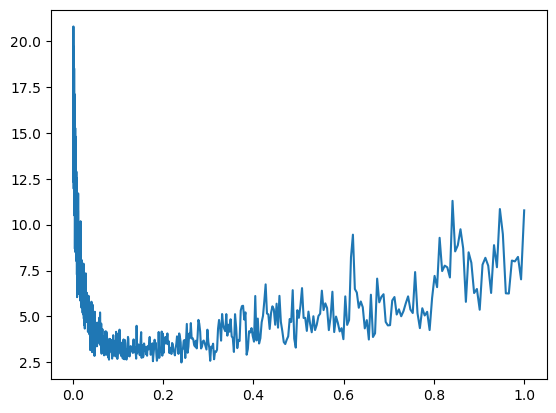

In [88]:
plt.plot(lri, lossi)

In [89]:
C = torch.randn((27, 2)) # Embedding Lookup Table C
W1 = torch.randn((6, 100))
b1 = torch.randn(100)
W2 = torch.randn((100, 27))
b2 = torch.randn(27)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

In [90]:
lri = []
lossi =[]
for i in range(1000):
    # minibatch construct
    ix = torch.randint(0, X.shape[0], (32,))
    
    #forward pass
    emb = C[X[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Y[ix])
    #print(loss.item())

    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    #update
    lr = lrs[i]
    for p in parameters:
        p.data += -lr * p.grad
        
    # track stats
    lri.append(lre[i])
    lossi.append(loss.item())
    
    

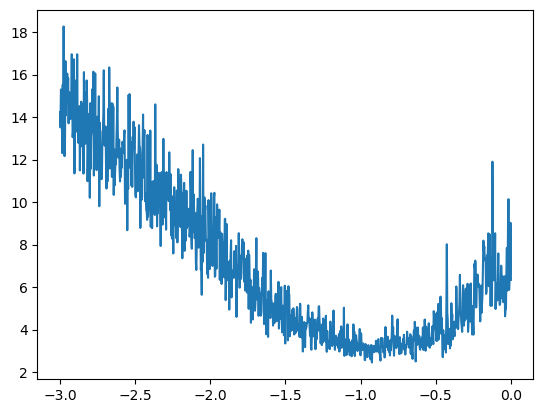

In [91]:
plt.plot(lri, lossi);

In [92]:
C = torch.randn((27, 2)) # Embedding Lookup Table C
W1 = torch.randn((6, 100))
b1 = torch.randn(100)
W2 = torch.randn((100, 27))
b2 = torch.randn(27)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

In [93]:
for i in range(100000):
    # minibatch construct
    ix = torch.randint(0, X.shape[0], (32,))
    
    #forward pass
    emb = C[X[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Y[ix])
    #print(loss.item())

    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    #update
    lr = 0.1
    for p in parameters:
        p.data += -lr * p.grad  

In [94]:
#forward pass
emb = C[X] # (228146, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (228146, 100)
logits = h @ W2 + b2 # (228146, 27)
loss = F.cross_entropy(logits, Y)
print(loss.item())

2.3372585773468018


In [95]:
# LETS DO LEARNING RATE DECAY

In [96]:
for i in range(100000):
    # minibatch construct
    ix = torch.randint(0, X.shape[0], (32,))
    
    #forward pass
    emb = C[X[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Y[ix])
    #print(loss.item())

    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    #update
    lr = 0.01
    for p in parameters:
        p.data += -lr * p.grad  

In [97]:
#forward pass
emb = C[X] # (228146, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (228146, 100)
logits = h @ W2 + b2 # (228146, 27)
loss = F.cross_entropy(logits, Y)
print(loss.item())

2.262504816055298


In [98]:
import random

random.seed(42)
random.shuffle(words)

n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

n1, n2

(25626, 28829)

In [99]:
Xtrain, Ytrain = build_dataset(words[:n1]) # train parameter
Xdev, Ydev = build_dataset(words[n1:n2]) # "train" hyper-parameter
Xtest, Ytest = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [100]:
C = torch.randn((27, 2)) # Embedding Lookup Table C
W1 = torch.randn((6, 100))
b1 = torch.randn(100)
W2 = torch.randn((100, 27))
b2 = torch.randn(27)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

In [101]:
for i in range(100000):
    # minibatch construct
    ix = torch.randint(0, Xtrain.shape[0], (32,)) ###
    
    #forward pass
    emb = C[Xtrain[ix]] # (32, 3, 2) ###
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Ytrain[ix]) ###
    #print(loss.item())

    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    #update
    lr = 0.1
    for p in parameters:
        p.data += -lr * p.grad  

In [102]:
#forward pass
emb = C[Xtrain] # (182625, 3, 2) ###
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (182625, 100)
logits = h @ W2 + b2 # (182625, 27)
loss = F.cross_entropy(logits, Ytrain) ###
print(loss.item())

2.312506914138794


In [103]:
#forward pass
emb = C[Xdev] # (22655, 3, 2) ###
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (22655, 100)
logits = h @ W2 + b2 # (22655, 27)
loss = F.cross_entropy(logits, Ydev) ###
print(loss.item())

2.3129830360412598


In [104]:
C = torch.randn((27, 2)) # Embedding Lookup Table C
W1 = torch.randn((6, 300))
b1 = torch.randn(300)
W2 = torch.randn((300, 27))
b2 = torch.randn(27)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

In [105]:
for i in range(200000): ###
    # minibatch construct
    ix = torch.randint(0, Xtrain.shape[0], (32,)) ###
    
    #forward pass
    emb = C[Xtrain[ix]] # (32, 3, 2) ###
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 300)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Ytrain[ix]) ###
    #print(loss.item())

    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    #update
    lr = 0.1 if i < 100000 else 0.01 #####
    for p in parameters:
        p.data += -lr * p.grad  

In [106]:
#forward pass
emb = C[Xtrain] # (182625, 3, 2) ###
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (182625, 300)
logits = h @ W2 + b2 # (182625, 27)
loss = F.cross_entropy(logits, Ytrain) ###
print(loss.item())

2.2306101322174072


In [107]:
#forward pass
emb = C[Xdev] # (22655, 3, 2) ###
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (22655, 300)
logits = h @ W2 + b2 # (22655, 27)
loss = F.cross_entropy(logits, Ydev) ###
print(loss.item())

2.2379441261291504


In [108]:
C = torch.randn((27, 10)) # Embedding Lookup Table C
W1 = torch.randn((30, 300))
b1 = torch.randn(300)
W2 = torch.randn((300, 27))
b2 = torch.randn(27)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

In [109]:
for i in range(200000): ###
    # minibatch construct
    ix = torch.randint(0, Xtrain.shape[0], (32,)) ###
    
    #forward pass
    emb = C[Xtrain[ix]] # (32, 3, 2) ###
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Ytrain[ix]) ###
    #print(loss.item())

    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    #update
    lr = 0.1 if i < 100000 else 0.01 #####
    for p in parameters:
        p.data += -lr * p.grad 

In [110]:
#forward pass
emb = C[Xtrain] # (182625, 3, 2) ###
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (182625, 300)
logits = h @ W2 + b2 # (182625, 27)
loss = F.cross_entropy(logits, Ytrain) ###
print(loss.item())

2.089655637741089


In [111]:
#forward pass
emb = C[Xdev] # (22655, 3, 2) ###
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (22655, 300)
logits = h @ W2 + b2 # (22655, 27)
loss = F.cross_entropy(logits, Ydev) ###
print(loss.item())

2.1644399166107178


In [112]:
#forward pass
emb = C[Xtest] # (22655, 3, 2) ###
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (22655, 300)
logits = h @ W2 + b2 # (22655, 27)
loss = F.cross_entropy(logits, Ytest) ###
print(loss.item())

2.1621453762054443


In [113]:
# sample from the model
g = torch.Generator().manual_seed(42)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
        emb = C[torch.tensor([context])] # (1,block_size,d)
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
    
    print(''.join(itos[i] for i in out))

yansy.
haviah.
nolle.
khalei.
nya.
tryannachel.
ena.
daya.
jian.
abdeuma.
lon.
topheon.
kimani.
lanne.
alex.
jahlan.
xaina.
luna.
adami.
zerianne.
